In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import missingno as msno

In [2]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

# 데이터 경로 맞춰주세요!
# 혹시 코랩환경을 사용하신다면 왼쪽 폴더모양 아이콘을 눌러 "train_data.csv"를 드래그&드롭으로 업로드한 후 사용해주세요
DATA_PATH = '/opt/ml/input/data/train_data.csv'
df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 4.1 s, sys: 412 ms, total: 4.51 s
Wall time: 4.51 s


# 시간 추가 전처리

In [3]:
def percentile(s):
    return np.sum(s) / len(s)

In [4]:
diff = df.loc[:, ['userID', 'Timestamp']].groupby('userID').diff().fillna(pd.Timedelta(seconds=0))
diff = diff.fillna(pd.Timedelta(seconds=0))
diff = diff['Timestamp'].apply(lambda x: x.total_seconds())

df['elapsed'] = diff

In [5]:
df['elapsed'] = df['elapsed'].shift(-1, axis=0)

# testcode 전처리

In [43]:
df['testcode'] = df['testId'].apply(lambda x: x[1:4])

# 유저 별 정답률 분석

In [7]:
stu_groupby = df.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})
stu_groupby.describe()

,assessmentItemID,answerCode
count,6698.000000,6698.000000
mean,338.397432,0.628909
std,321.331429,0.159639
min,9.000000,0.000000
25%,78.000000,0.527273
50%,231.500000,0.651757
75%,513.000000,0.751203
max,1860.000000,1.000000


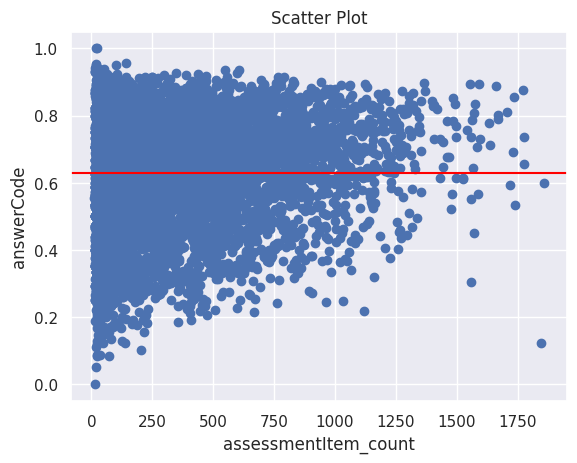

In [81]:
plt.scatter(stu_groupby['assessmentItemID'], stu_groupby['answerCode'])
plt.axhline(stu_groupby['answerCode'].mean(), color='red')
plt.xlabel('assessmentItem_count')
plt.ylabel('answerCode')
plt.title('Scatter Plot')
plt.show()

## 누구냐 만점자 2명!

In [8]:
stu_groupby[stu_groupby['answerCode'] == 1]

,assessmentItemID,answerCode
userID,,
6988,23,1.0
7171,20,1.0


In [9]:
df[df['userID']==6988]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed
2257763,6988,A080002001,A080000002,1,2020-01-20 06:00:04,4605,2.0
2257764,6988,A080002002,A080000002,1,2020-01-20 06:00:06,1394,4.0
2257765,6988,A080002003,A080000002,1,2020-01-20 06:00:10,1396,8.0
2257766,6988,A080002004,A080000002,1,2020-01-20 06:00:18,1397,5.0
2257767,6988,A080002005,A080000002,1,2020-01-20 06:00:23,1396,3.0
2257768,6988,A080002006,A080000002,1,2020-01-20 06:00:26,1395,18996168.0
2257769,6988,A050181001,A050000181,1,2020-08-27 02:43:14,10397,214.0
2257770,6988,A050181002,A050000181,1,2020-08-27 02:46:48,10397,181.0
2257771,6988,A050181003,A050000181,1,2020-08-27 02:49:49,10397,153.0
2257772,6988,A050181004,A050000181,1,2020-08-27 02:52:22,10397,33.0


In [10]:
df[df['userID']==7171]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed
2261914,7171,A060183001,A060000183,1,2020-08-11 10:15:05,1576,22.0
2261915,7171,A060183002,A060000183,1,2020-08-11 10:15:27,1575,5.0
2261916,7171,A060183003,A060000183,1,2020-08-11 10:15:32,1576,101.0
2261917,7171,A060183004,A060000183,1,2020-08-11 10:17:13,1575,115.0
2261918,7171,A060183005,A060000183,1,2020-08-11 10:19:08,1576,1787424.0
2261919,7171,A060185001,A060000185,1,2020-09-01 02:49:32,1580,25.0
2261920,7171,A060185002,A060000185,1,2020-09-01 02:49:57,1581,232.0
2261921,7171,A060185003,A060000185,1,2020-09-01 02:53:49,1581,33.0
2261922,7171,A060185004,A060000185,1,2020-09-01 02:54:22,1581,43.0
2261923,7171,A060185005,A060000185,1,2020-09-01 02:55:05,1581,3836835.0


만점자에게 특별한 점은 없지만 이상치로 보고 제거?

## 0점인 학생은?

In [12]:
stu_groupby[stu_groupby['answerCode'] == 0]

,assessmentItemID,answerCode
userID,,
7166,16,0.0


In [13]:
df[df['userID']==7166]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed
2261803,7166,A030126001,A030000126,0,2020-07-30 22:46:27,574,95.0
2261804,7166,A030126002,A030000126,0,2020-07-30 22:48:02,574,77.0
2261805,7166,A030126003,A030000126,0,2020-07-30 22:49:19,574,10.0
2261806,7166,A030126004,A030000126,0,2020-07-30 22:49:29,574,4.0
2261807,7166,A030126005,A030000126,0,2020-07-30 22:49:33,574,4689767.0
2261808,7166,A010163001,A010000163,0,2020-09-23 05:32:20,7809,9.0
2261809,7166,A010163002,A010000163,0,2020-09-23 05:32:29,7809,3.0
2261810,7166,A010163003,A010000163,0,2020-09-23 05:32:32,7809,1.0
2261811,7166,A010163004,A010000163,0,2020-09-23 05:32:33,7809,5.0
2261812,7166,A010163005,A010000163,0,2020-09-23 05:32:38,7809,7599276.0


1명 뿐이고 찍은 느낌을 주는 Test 도 발견 이상치 제거

## 이상치 분석

많은 문제를 풀었지만 정답률이 낮은 학생 2명 분석

In [78]:
stu_groupby.loc[481:482]

,assessmentItemID,answerCode
userID,,
481,1847,0.124526


In [14]:
outlier_id1 = df[df['userID'] == 481]
outlier_id1.describe()

,userID,answerCode,Timestamp,KnowledgeTag,elapsed
count,1847.0,1847.000000,1847,1847.000000,1.847000e+03
mean,481.0,0.124526,2020-08-14 00:54:57.155928320,4215.559827,1.417264e+04
min,481.0,0.000000,2020-03-01 02:47:37,116.000000,0.000000e+00
25%,481.0,0.000000,2020-06-28 21:39:39,705.000000,2.000000e+00
50%,481.0,0.000000,2020-08-20 07:32:51,1548.000000,3.000000e+00
75%,481.0,0.000000,2020-10-06 05:14:00,8005.000000,1.400000e+01
max,481.0,1.000000,2020-12-29 02:08:48,10838.000000,3.790402e+06
std,0.0,0.330270,NaN,3805.340085,1.262338e+05


In [16]:
stu_groupby.iloc[520:521]

,assessmentItemID,answerCode
userID,,
585,1557,0.303789


In [17]:
outlier_id2 = df[df['userID'] == 585]
outlier_id2.describe()

,userID,answerCode,Timestamp,KnowledgeTag,elapsed
count,1557.0,1557.000000,1557,1557.000000,1557.000000
mean,585.0,0.303789,2020-07-27 00:51:58.374438144,5016.434168,15234.432241
min,585.0,0.000000,2020-03-06 13:27:00,23.000000,0.000000
25%,585.0,0.000000,2020-06-14 14:21:32,2718.000000,2.000000
50%,585.0,0.000000,2020-07-20 02:25:25,4804.000000,4.000000
75%,585.0,1.000000,2020-09-19 01:35:28,7924.000000,38.000000
max,585.0,1.000000,2020-12-06 02:20:31,10573.000000,521979.000000
std,0.0,0.460041,NaN,2768.826353,58629.965562


In [20]:
outlier_id1[outlier_id1['elapsed']>650]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed
354412,481,A070001009,A070000001,1,2020-03-01 02:54:47,116,2055475.0
354421,481,A070005008,A070000005,0,2020-03-24 21:53:21,3794,75197.0
354430,481,A070007009,A070000007,0,2020-03-25 18:46:55,607,459694.0
354438,481,A070009009,A070000009,0,2020-03-31 02:29:23,3795,59506.0
354447,481,A070011008,A070000011,1,2020-03-31 19:01:26,3820,172493.0
...,...,...,...,...,...,...,...
356203,481,A070111008,A070000111,0,2020-11-05 01:57:39,9660,170860.0
356209,481,A070112005,A070000112,1,2020-11-07 01:25:49,9660,3790402.0
356217,481,A070129006,A070000129,0,2020-12-20 22:20:14,9065,7014.0
356225,481,A070127008,A070000127,0,2020-12-21 00:17:41,9066,5270.0


In [21]:
outlier_id1[outlier_id1['elapsed']>650].testId.nunique()

97

In [22]:
outlier_id1[outlier_id1['elapsed']>650].loc[:,'elapsed'] = 650

In [23]:
# 문제 풀이 시간이 너무 큰 경우 650으로 변경
outlier_id1['elapsed'] = outlier_id1['elapsed'].apply(lambda x: 650 if x > 650 else x)

/tmp/ipykernel_9910/1995579594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id1['elapsed'] = outlier_id1['elapsed'].apply(lambda x: 650 if x > 650 else x)


# 문제 별 정답률 분석

In [26]:
prob_groupby = df.groupby('assessmentItemID').agg({
    'userID': 'count',
    'answerCode': percentile
})
prob_groupby.describe()

,userID,answerCode
count,9454.000000,9454.000000
mean,239.748889,0.654256
std,71.893791,0.195488
min,43.000000,0.049430
25%,220.000000,0.505548
50%,230.000000,0.666667
75%,271.000000,0.820513
max,454.000000,0.996310


In [27]:
prob_groupby.corr()

,userID,answerCode
userID,1.000000,0.002082
answerCode,0.002082,1.000000


In [28]:
pro_mean = prob_groupby['answerCode'].mean()

In [29]:
pro_high = prob_groupby[prob_groupby['answerCode']>=pro_mean]
pro_low = prob_groupby[prob_groupby['answerCode']<pro_mean]

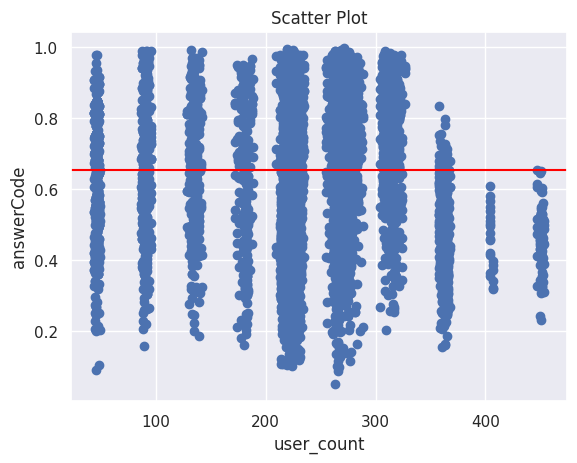

In [80]:
plt.scatter(prob_groupby['userID'], prob_groupby['answerCode'])
plt.axhline(prob_groupby['answerCode'].mean(), color='red')
plt.xlabel('user_count')
plt.ylabel('answerCode')
plt.title('Scatter Plot')
plt.show()

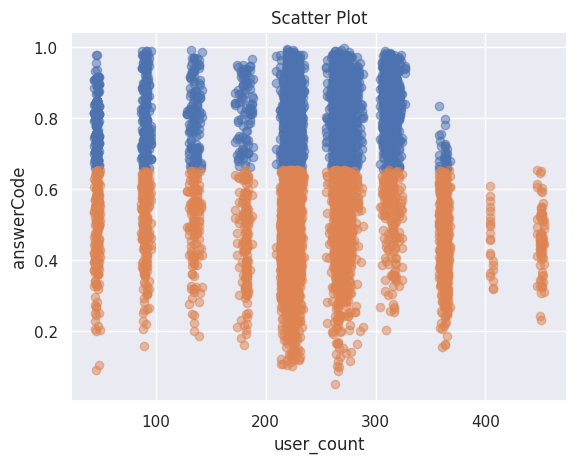

In [79]:
plt.scatter(pro_high['userID'], pro_high['answerCode'], alpha=0.5)
plt.scatter(pro_low['userID'], pro_low['answerCode'], alpha=0.5)
plt.xlabel('user_count')
plt.ylabel('answerCode')
plt.title('Scatter Plot')
plt.show()

- 350명 이하의 유저가 푼 문제들은 대체로 정답률이 골고루 분포함
- 350명 이상이 푼 문제의 정답률의 범위가 줄어듬

In [32]:
prob_groupby[prob_groupby['answerCode'] < 0.2]

,userID,answerCode
assessmentItemID,,
A010136005,177,0.180791
A020020005,260,0.196154
A020103005,266,0.086466
A020168005,139,0.187050
A020173005,283,0.162544
...,...,...
A080099003,363,0.162534
A080101003,363,0.159780
A080129006,361,0.155125


## 이상치 문제? 보기

In [33]:
prob_groupby.loc[(prob_groupby['answerCode'] <= 0.2) & (prob_groupby['userID'] <= 100)]

,userID,answerCode
assessmentItemID,,
A070162008,89,0.157303
A090002004,48,0.104167
A090071004,45,0.088889
A090071006,45,0.200000


In [34]:
df[df['assessmentItemID']== 'A090071004']

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed
1655,1,A090071004,A090000071,0,2020-11-04 02:18:53,9929,211.0
74884,97,A090071004,A090000071,0,2020-12-13 10:14:15,9929,18.0
128536,165,A090071004,A090000071,0,2020-12-17 23:20:41,9929,3.0
289939,393,A090071004,A090000071,0,2020-12-11 07:01:02,9929,1.0
331845,447,A090071004,A090000071,0,2020-11-21 02:08:27,9929,2.0
396972,543,A090071004,A090000071,0,2020-12-03 04:50:51,9929,4.0
409208,567,A090071004,A090000071,0,2020-11-13 00:07:03,9929,1.0
424943,592,A090071004,A090000071,0,2020-12-09 05:20:36,9929,2.0
520725,729,A090071004,A090000071,1,2020-11-13 05:51:54,9929,1334.0
536940,751,A090071004,A090000071,0,2020-12-01 03:29:44,9929,5.0


In [35]:
df.iloc[1769280:1769292]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed
1769280,3260,A090069003,A090000069,1,2020-12-08 01:20:50,2644,159.0
1769281,3260,A090069004,A090000069,1,2020-12-08 01:23:29,9924,11.0
1769282,3260,A090069005,A090000069,1,2020-12-08 01:23:40,2644,56.0
1769283,3260,A090069006,A090000069,1,2020-12-08 01:24:36,9924,620713.0
1769284,3260,A090071001,A090000071,1,2020-12-15 05:49:49,2644,85.0
1769285,3260,A090071002,A090000071,1,2020-12-15 05:51:14,9924,174.0
1769286,3260,A090071003,A090000071,1,2020-12-15 05:54:08,9924,326.0
1769287,3260,A090071004,A090000071,1,2020-12-15 05:59:34,9929,90.0
1769288,3260,A090071005,A090000071,1,2020-12-15 06:01:04,2647,7.0
1769289,3260,A090071006,A090000071,0,2020-12-15 06:01:11,2647,3.0


- 어려운 문제를 맞은 유저들은 약간의 긴 시간을 투자하고 틀린 유저들은 대체로 짧은 시간을 투자함

## 가장 어려운 문제 분석

In [36]:
# 정답률이 가장 낮은 문제
prob_groupby[prob_groupby['answerCode'] <= 0.049431]

,userID,answerCode
assessmentItemID,,
A040131005,263,0.04943


In [37]:
hard_pro = df[df['assessmentItemID']== 'A040131005']
hard_pro[hard_pro['answerCode'] == 1]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed
39300,51,A040131005,A040000131,1,2020-07-28 09:06:24,10615,80877.0
106414,137,A040131005,A040000131,1,2020-09-18 03:18:35,10615,259021.0
134400,174,A040131005,A040000131,1,2020-02-01 03:00:01,10615,1852.0
377936,515,A040131005,A040000131,1,2020-09-27 02:22:34,10615,90.0
498412,700,A040131005,A040000131,1,2020-09-11 06:40:44,10615,150284.0
921840,1365,A040131005,A040000131,1,2020-09-08 02:57:14,10615,101668.0
1001742,1497,A040131005,A040000131,1,2020-06-26 12:35:28,10615,69456.0
1445015,2403,A040131005,A040000131,1,2020-10-08 10:25:12,10615,119.0
1538834,2635,A040131005,A040000131,1,2020-10-06 05:30:15,10615,122787.0
1682236,2997,A040131005,A040000131,1,2020-09-24 07:19:11,10615,59251.0


In [82]:
hard_pro[hard_pro['answerCode'] == 1].elapsed.mean(), hard_pro[hard_pro['answerCode'] == 0].elapsed.mean()

(84975.46153846153, 203087.86)

In [92]:
elapsed_answer = hard_pro.groupby('elapsed').agg({'answerCode': percentile, 'userID': 'count'})

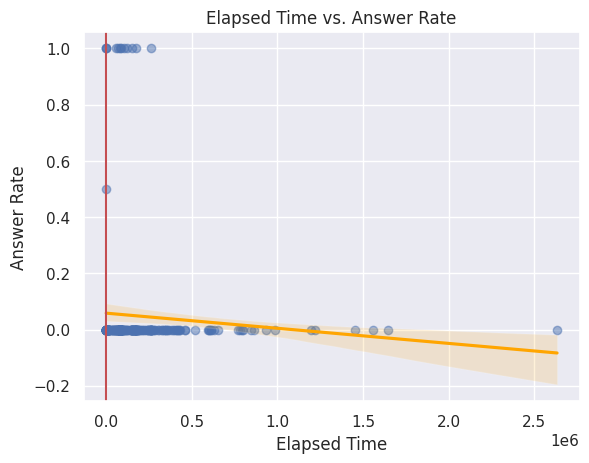

In [93]:
fig, ax = plt.subplots()
g = sns.regplot(x=elapsed_answer.index[:-1], y=elapsed_answer.answerCode.values[:-1],
            scatter_kws={'alpha':0.5}, line_kws={"color": "orange"}, ax=ax)
ax.set_title('Elapsed Time vs. Answer Rate')
ax.set_xlabel('Elapsed Time')
ax.set_ylabel('Answer Rate')
ax.axvline(22, color='r')
# ax.set_xlim(-10, 650)

In [38]:
smart_peo = hard_pro[hard_pro['answerCode'] == 1].userID.unique()
stu_groupby.loc[smart_peo, :]

,assessmentItemID,answerCode
userID,,
51,1662,0.888688
137,398,0.552764
174,1525,0.615082
515,830,0.724096
700,538,0.828996
1365,529,0.773157
1497,775,0.659355
2403,579,0.739206
2635,540,0.696296


In [39]:
df.loc[(df.userID == 3640) & (df.testId == 'A040000131')]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed
1874503,3640,A040131001,A040000131,1,2020-09-17 09:44:18,2102,19.0
1874504,3640,A040131002,A040000131,1,2020-09-17 09:44:37,10615,13.0
1874505,3640,A040131003,A040000131,1,2020-09-17 09:44:50,2102,13.0
1874506,3640,A040131004,A040000131,0,2020-09-17 09:45:03,2102,68.0
1874507,3640,A040131005,A040000131,1,2020-09-17 09:46:11,10615,64.0


- 어려운 문제의 경우는 찍어서 맞추는 유저가 없어 보임
- 맞춘 유저의 평균 시간이 틀린 유저의 평균 시간보다 작다

## 51번 학생 넌 누구냐?

- 많은 문제를 풀고 정답률도 높은 학생

In [45]:
user51 = df[df['userID']==51]
user51.describe()

,userID,answerCode,Timestamp,KnowledgeTag,elapsed
count,1662.0,1662.000000,1662,1662.000000,1662.000000
mean,51.0,0.888688,2020-06-11 01:17:49.356798976,3920.290614,17405.469916
min,51.0,0.000000,2020-01-02 11:13:33,23.000000,0.000000
25%,51.0,1.000000,2020-03-23 18:34:25.249999872,2077.250000,36.000000
50%,51.0,1.000000,2020-06-04 11:38:58.500000,3691.000000,80.000000
75%,51.0,1.000000,2020-08-27 10:11:41.249999872,4974.000000,284.500000
max,51.0,1.000000,2020-12-02 06:45:04,11271.000000,629485.000000
std,0.0,0.314612,NaN,2598.554850,55454.079949


In [46]:
user51.testcode.unique()

array(['040', '080', '050'], dtype=object)

In [47]:
user51[user51['answerCode']==0]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed,testcode
38265,51,A040010002,A040000010,0,2020-01-09 11:36:29,2048,208.0,040
38268,51,A040010005,A040000010,0,2020-01-09 11:50:15,2047,168.0,040
38274,51,A040011005,A040000011,0,2020-01-10 04:11:12,2049,31.0,040
38292,51,A040012005,A040000012,0,2020-01-14 11:31:19,2050,92.0,040
38293,51,A040012006,A040000012,0,2020-01-14 11:32:51,2050,110915.0,040
...,...,...,...,...,...,...,...,...
39748,51,A040150003,A040000150,0,2020-10-23 11:09:50,2115,83.0,040
39753,51,A080129003,A080000129,0,2020-10-23 16:23:45,2725,70.0,080
39756,51,A080129006,A080000129,0,2020-10-23 16:29:18,2725,228139.0,080
39855,51,A080102004,A080000102,0,2020-11-24 01:28:17,7170,63.0,080


- 4, 5, 8 testcode를 풀었다
- 틀린 문제도 찍은게 아니라 시간을 투자했지만 틀림
- 평균 시간이 높음

## 시간 관련 이상치 발견?

In [48]:
df[df['assessmentItemID']== 'A090002004']

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed,testcode
127543,165,A090002004,A090000002,0,2020-02-20 02:49:57,4697,1.0,090
226797,306,A090002004,A090000002,0,2020-06-21 07:18:03,4697,347.0,090
264389,358,A090002004,A090000002,0,2020-03-04 02:33:30,4697,5.0,090
268381,365,A090002004,A090000002,0,2020-04-11 04:59:42,4697,74.0,090
347254,467,A090002004,A090000002,0,2020-02-27 04:14:49,4697,8.0,090
509570,718,A090002004,A090000002,0,2020-05-03 06:08:54,4697,77.0,090
519742,729,A090002004,A090000002,0,2020-05-08 01:50:36,4697,13.0,090
536377,751,A090002004,A090000002,0,2020-04-11 03:58:35,4697,5.0,090
575661,813,A090002004,A090000002,0,2020-05-13 03:10:35,4697,50.0,090
607615,863,A090002004,A090000002,0,2020-04-08 20:23:46,4697,80.0,090


In [49]:
# 어려운 문제를 적은 시간에 맞춘 유저 분석
df[df['userID']== 2900]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed,testcode
1643848,2900,A020028001,A020000028,1,2020-04-02 09:06:50,7913,72.0,020
1643849,2900,A020028002,A020000028,1,2020-04-02 09:08:02,7913,16.0,020
1643850,2900,A020028003,A020000028,1,2020-04-02 09:08:18,7913,33.0,020
1643851,2900,A020028004,A020000028,1,2020-04-02 09:08:51,7913,53.0,020
1643852,2900,A020028005,A020000028,1,2020-04-02 09:09:44,7913,1189555.0,020
...,...,...,...,...,...,...,...,...
1644461,2900,A090037007,A090000037,1,2020-12-29 03:55:28,9852,9.0,090
1644462,2900,A090037001,A090000037,0,2020-12-29 03:55:37,1249,2.0,090
1644463,2900,A090037002,A090000037,0,2020-12-29 03:55:39,1249,2.0,090
1644464,2900,A090037005,A090000037,0,2020-12-29 03:55:41,1249,84.0,090


In [50]:
# 대체로 문제를 보고 한번에 푸는 유저
df[df['userID']== 2900].iloc[195:210]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed,testcode
1644043,2900,A090001006,A090000001,1,2020-07-04 06:51:46,78,12.0,090
1644044,2900,A090001007,A090000001,1,2020-07-04 06:51:58,4697,31.0,090
1644045,2900,A090001001,A090000001,1,2020-07-04 06:52:29,4697,1.0,090
1644046,2900,A090001008,A090000001,1,2020-07-04 06:52:30,4697,336.0,090
1644047,2900,A090002002,A090000002,1,2020-07-04 06:58:06,78,3.0,090
1644048,2900,A090002003,A090000002,1,2020-07-04 06:58:09,78,2.0,090
1644049,2900,A090002004,A090000002,1,2020-07-04 06:58:11,4697,2.0,090
1644050,2900,A090002005,A090000002,1,2020-07-04 06:58:13,4699,2.0,090
1644051,2900,A090002006,A090000002,1,2020-07-04 06:58:15,78,2.0,090
1644052,2900,A090002008,A090000002,1,2020-07-04 06:58:17,4697,15.0,090


In [96]:
stu_groupby.loc[2900:2900, :]

,assessmentItemID,answerCode
userID,,
2900,618,0.642395


- 문제 풀이 시간보다 평균 문제 풀이 시간을 넢는게 좋아 보인다.

# 시험지 별 정답률 분석

In [52]:
test_groupby = df.groupby('testId').agg({
    'userID': 'count',
    # 'assessmentItemID': 'count',
    'answerCode': percentile
})
test_groupby.describe()

,userID,answerCode
count,1537.000000,1537.000000
mean,1474.681848,0.667982
std,533.526783,0.138903
min,172.000000,0.327186
25%,1320.000000,0.561819
50%,1400.000000,0.680519
75%,1602.000000,0.778439
max,3960.000000,0.955474


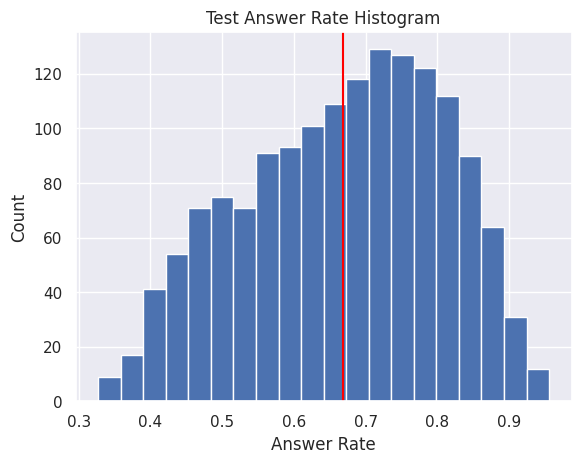

In [53]:
fig, ax = plt.subplots()
test_groupby['answerCode'].hist(bins=20)
ax.set_title('Test Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(test_groupby['answerCode'].mean(), color='red')
# ax.grid(b=True)

# 유형 별 정답률 분석

In [72]:
know_groupby = df.groupby('KnowledgeTag').agg({
    'userID': 'count',
    # 'assessmentItemID': 'count',
    # 'testId': 'count',
    'answerCode': percentile
})
know_groupby.describe()

,userID,answerCode
count,912.000000,912.000000
mean,2485.291667,0.615524
std,1732.086925,0.148329
min,44.000000,0.188940
25%,1025.250000,0.498239
50%,2204.000000,0.599585
75%,4052.750000,0.740288
max,12892.000000,0.977778


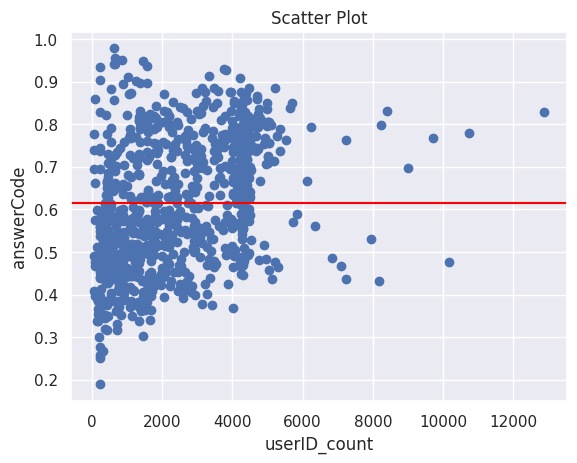

In [73]:
plt.scatter(know_groupby['userID'], know_groupby['answerCode'])
plt.axhline(know_groupby['answerCode'].mean(), color='red')
plt.xlabel('userID_count')
plt.ylabel('answerCode')
plt.title('Scatter Plot')
plt.show()

## KnowledgeTag 유형별 확인

In [55]:
# KnowledgeTag 고유값 추출
know_uni = df.KnowledgeTag.unique()

In [56]:
# KnowledgeTag 고유값 중에 testcode 여러개 있는 KnowledgeTag 추출
not_know = []
for i in know_uni:
    if len(df[df['KnowledgeTag'] == i].testcode.unique()) != 1:
        not_know.append(i)

In [57]:
# 오직 7863만 testcode 2개
not_know

[7863]

In [58]:
df[df['KnowledgeTag'] == 7863].testcode.unique()

array(['080', '070'], dtype=object)

In [59]:
df[df['KnowledgeTag'] == 7863]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,elapsed,testcode
230,0,A080037007,A080000037,0,2020-06-03 16:12:57,7863,3.0,080
5893,9,A070150003,A070000150,1,2020-12-11 20:16:41,7863,42.0,070
5894,9,A070150004,A070000150,1,2020-12-11 20:17:23,7863,171.0,070
5901,9,A070152003,A070000152,1,2020-12-14 20:44:46,7863,154.0,070
5911,9,A070154005,A070000154,1,2020-12-18 19:13:03,7863,9.0,070
...,...,...,...,...,...,...,...,...
2262727,7213,A070152003,A070000152,0,2020-12-24 03:44:16,7863,1.0,070
2262904,7223,A070151007,A070000151,1,2020-12-02 22:45:21,7863,2.0,070
2265424,7360,A070149003,A070000149,0,2020-12-24 06:17:39,7863,2.0,070
2265425,7360,A070149004,A070000149,0,2020-12-24 06:17:41,7863,2.0,070


오직 7863 유형만이 testcode의 중복을 가짐

testcode는 난이도가 아니다!

## 유저별 testcode 확인

In [60]:
user_uni = df.userID.unique()

In [61]:
dup_testcode_user = []
max_dup_user = 0
for i in user_uni:
    if len(df[df['userID'] == i].testcode.unique()) > 1:
        max_dup_user = max(max_dup_user, len(df[df['userID'] == i].testcode.unique()))
        dup_testcode_user.append(i)

In [62]:
len(dup_testcode_user), max_dup_user

(6596, 3)

In [63]:
df[df['userID'] == dup_testcode_user[0]].testcode.unique()

array(['060', '080', '020'], dtype=object)

In [64]:
dup_testcode = []
for i in user_uni:
    if list(df[df['userID'] == i].testcode.unique()) not in dup_testcode:
        dup_testcode.append(list(df[df['userID'] == i].testcode.unique()))

In [65]:
len(dup_testcode)

561

In [66]:
df[df['userID'] == 0].testcode.unique()

array(['060', '080', '020'], dtype=object)

In [67]:
from collections import Counter

# Counter를 사용하여 중복된 리스트 제거
unique_list = [list(k) for k, _ in Counter(map(tuple, map(sorted, dup_testcode))).items()]

len(unique_list)

129

In [69]:
for i in range(1,8):
    for j in range(i+1, 9):
        for k in range(j+1, 10):
            if ['0{}0'.format(i), '0{}0'.format(j), '0{}0'.format(k)] not in unique_list:
                print(i, j, k)

유저들은 최대 3번의 모든 경우의 수로 testcode를 경험했다.

In [ ]:
def tag_map(x: int) -> int:
    x = int(x)
    x = x // 100
    return x

In [ ]:
def level_num(x: str) -> int:
    x = x[1]
    return int(x)

In [ ]:
df['level'] = df['level'].apply(level_num)

In [ ]:
df['KnowledgeTag_cat'] = df['KnowledgeTag'].apply(tag_map)

In [ ]:
df['testcode'] = df['level']

In [ ]:
tag_lv_groupby = df.groupby(['KnowledgeTag_cat', 'testcode'])['answerCode'].apply(percentile)
# yticks = [2, 1, 4, 6, 3, 7, 5, 9, 8]
# yticks = [8, 9, 5, 7, 3, 6, 4, 1, 2]
# ytick_labels = ['080', '090', '050', '070', '030', '060', '040', '010', '020']

g = sns.scatterplot(
    data=tag_lv_groupby,
    x='KnowledgeTag_cat',
    y='testcode',
    s = tag_lv_groupby.apply(point_size)
)
ax = plt.gca()
# plt.yticks(yticks, ytick_labels)
ax.set_title('Tag # - testcode #')

In [ ]:
tag_lv_groupby = df.groupby(['KnowledgeTag', 'testcode'])['answerCode'].apply(percentile)
# yticks = [2, 1, 4, 6, 3, 7, 5, 9, 8]
# yticks = [8, 9, 5, 7, 3, 6, 4, 1, 2]
# ytick_labels = ['080', '090', '050', '070', '030', '060', '040', '010', '020']

g = sns.scatterplot(
    data=tag_lv_groupby,
    x='KnowledgeTag',
    y='testcode',
    s = tag_lv_groupby.apply(point_size),
    alpha = 0.1
)
ax = plt.gca()
# plt.yticks(yticks, ytick_labels)
ax.set_title('Tag # - testcode #')

In [ ]:
tag_lv_groupby

In [ ]:
size_range = [2, 200]

In [ ]:
def point_size(scaled_accuracy):
    return size_range[0] + (size_range[1] - size_range[0]) * scaled_accuracy

In [ ]:
pp_size = tag_lv_groupby.apply(point_size)

In [ ]:
tag_lv_groupby.sort_index()